# HPC@UCLA: Running Jupyter Notebooks on the Hoffman2 Cluster

## Raffaella D'Auria, PhD

### Learning Outcomes
- what are Jupyter Notebooks or JupyterLab
- connecting to the Hoffman2 Cluster via Jupyter Notebooks/JupyterLab via the h2jupynb script
- setting up SSH keys 
- request resources for yuor jupyter notebook/lab session
- running python/anaconda kernels in Jupyter
- running python/anaconda virtual environments kernels in Jupyter
- install packages in python/conda virtual environments
- python virtual environment example: train a one neuron net
- installing and running Julia kernels in Jupyter
- running R kernels in Jupyter
- running R virtual environments kernels in Jupyter 
- running Bash kernels in Jupyter

## Interactive computing with computational notebooks

In [ ]:
import numpy as np
a = np.arange(15).reshape(5,3)
a

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)-np.cos(2*np.pi*t)*np.square(np.cos(2*np.pi*t))
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)

plt.show()

# What are/is  Jupyter Notebooks/Lab


- "A computational notebook is a shareable document that combines computer code, plain language descriptions, data, rich visualizations like 3D models, charts, graphs and figures, and interactive controls." [Project Jupyter](https://jupyter.org/)


- "A notebook, along with an editor like Jupyter Notebook, provides a fast interactive environment for prototyping and explaining code, exploring and visualizing data, and sharing ideas with others." [Project Jupyter](https://jupyter.org/)

- [Project Jupyter](https://jupyter.org/) aims to support interactive data science and scientific computing across all programming languages

  - [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/latest/) is a web-based interactive computing platform  
  - [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) is the latest web-based interactive development environment  
  - [JupyterLabDesktop](https://github.com/jupyterlab/jupyterlab-desktop) "is quickest and easiest way to get started with Jupyter notebooks on your personal computer"  

**This presentation is a jupyer notebook running on Hoffman2 shown as slides via [RISE](https://rise.readthedocs.io/en/latest/) and translated to slides using [reveal.js](https://revealjs.com/)**

# Connecting via Jupyter Notebooks/Lab via the h2jupynb script

https://www.hoffman2.idre.ucla.edu/Using-H2/Connecting/Connecting.html#connecting-via-jupyter-notebook-lab

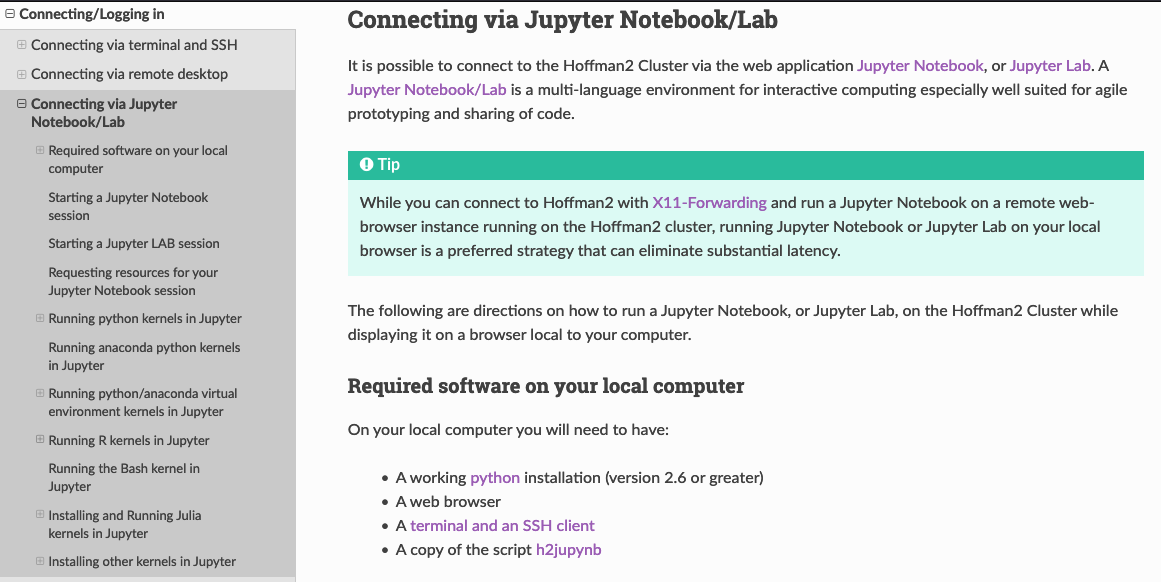

## Connecting via Jupyter Notebooks/Lab via h2jupynb
https://www.hoffman2.idre.ucla.edu/Using-H2/Connecting/Connecting.html#connecting-via-jupyter-notebook-lab

- You can display a Jupyter Notebook or JupyterLab session on your local browser while running the interactive code on the Hoffman2 Cluster!

### Prereqs on your local computer

- terminal and SSH client
- a python installation
  - on Windows you can use any of the following applications: 
     - [powershell](https://learn.microsoft.com/en-us/powershell/)
     - [MobaXterm](https://mobaxterm.mobatek.net/) (install python via: `apt-get install python3`) 
     - [Windows Subsystems for Linux](https://docs.microsoft.com/en-us/windows/wsl/about) (install python via: `sudo apt-get install python3`) 
     - [Gib Bash](https://gitforwindows.org/) (install python systemwide making sure to add python to the system PATH)
- the [h2jupynb script](https://github.com/rdauria/jupyter-notebook)


## Before downloading the h2jupynb script to your local computer, let's set up SSH keys

- SSH (Secure SHell) keys are access credentials (just like `username` + `password`)
- we create an SSH key pair on the local computer and copy the public component of the key to the Hoffman2 Cluster
- we edit/create the local `$HOME/.ssh/config` file to set up the SSH forwarding agent

### Setting up SSH keys (not needed but it will simplify matters) <mark>ON YOUR LOCAL COMPUTER</mark> (Hands-on)

  - open a **local (NOT CONNECTED TO HOFFMAN2)** terminal, issue (**change `joebruin` with your Hoffman2 username**):
    
```
    cd $HOME/.ssh  
    ssh-keygen -t ed25519 -b 4096 -C "$USER@$HOSTNAME" -f "joebruin@hoffman2"
``` 


  - **enter a passphrase to make authentication with SSH key more secure**

  - copy the public key onto your Hoffman2 Cluster account (<mark>replace `joebruin` with your Hoffman2 `username`</mark>) by entering **on the terminal on your local (NOT CONNECTED TO HOFFMAN2)** terminal:
  
    `ssh-copy-id -i ~/.ssh/joebruin@hoffman2 joebruin@hoffman2.idre.ucla.edu   # password`
    <p> <br> </p>
  

### Setting up SSH keys & using SSH forwarding agent (Hands-on) - w/ passphrase (preferred)

- edit your **local (NOT CONNECTED TO HOFFMAN2)** $HOME/.ssh/config

  - to edit the file on your local computer you can use: 
  
    ```
    nano ~/.ssh/config
    ```

  - when the editor opens paste in it (<mark>**change `joebruin` with your Hoffman2 username**</mark>):

```
     Host hoffman2
       User joebruin
       hostname hoffman2.idre.ucla.edu
       ServerAliveInterval 30
       ServerAliveCountMax 5
       IPQoS throughput
       AddKeysToAgent yes
       IdentityFile ~/.ssh/joebruin@hoffman2
       ForwardX11Trusted yes
       ForwardX11 yes
```
  
  - to exit `Control`+`X`

#### Start the SSH forwarding agent

- issue on your **local (NOT CONNECTED TO HOFFMAN2)** terminal:

  `ssh-add ~/.ssh/joebruin@hoffman2  # you will be prompted for your passphrase`


- any successive ssh into the cluster from this terminal session will be password-less

- you will need to re-run the `ssh-add` command from any new terminal session

## Setting up SSH keys (Hands-on) - w/out passphrase (less secure)

- edit your <mark>**local**</mark> $HOME/.ssh/config file and add the following lines to it (**change `joebruin` with your Hoffman2 username**):

```
     Host hoffman2
       User joebruin
       hostname hoffman2.idre.ucla.edu
       ServerAliveInterval 30
       ServerAliveCountMax 5
       IPQoS throughput
       IdentityFile ~/.ssh/joebruin@hoffman2
       ForwardX11Trusted yes
       ForwardX11 yes
```

- any successive ssh into the cluster will be password-less

## Setting up SSH keys (Hands-on) - w passphrase (type your passphrase every time)

### You may decide that typing your passphrase every time is OK and you feel this is more secure

- edit your local $HOME/.ssh/config file and add the following lines to it (change joebruin with your Hoffman2 username):

     Host hoffman2
       User joebruin
       hostname hoffman2.idre.ucla.edu
       ServerAliveInterval 30
       ServerAliveCountMax 5
       IPQoS throughput
       IdentityFile ~/.ssh/joebruin@hoffman2
       ForwardX11Trusted yes
       ForwardX11 yes

- any successive ssh into the cluster will be password-less



## Start a Jupyter Notebook session via [h2jupynb](https://github.com/rdauria/jupyter-notebook) (Hands-on)

### Let's download the h2jupynb script to your <mark>local</mark> computer

1. to download the [h2jupynb script](https://github.com/rdauria/jupyter-notebook) open the terminal on your local machine and issue:
   
   `curl -O https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`


2. check out the various options you can request for your Jupyter Notebook/JupyterLab session with:
   
   `python3 h2jupynb --help`

```
   h2jupynb version  3.0
   Usage:
   
   h2jupynb [-u <Hoffman2 user name>] [-v <python-version>] 
         [-t <time, integer number of hours>] [-m <memory, integer number of GB per core>] 
         [-e <parallel environment: 1 for shared, 2 for distributed>] [-s <number of slots>] 
         [-o <run on group owned nodes: yes/no>] [-x <run on an exclusively reserved node: yes/no>]  
         [-a <CPU-type>] [-d <path to directory from which the jupyter NB/lab will start>] 
         [-g <run on a gpu node: yes/no>] [-c <gpu-card-type>] [-l <cuda-version>] 
         [-p <port number>]  [-j <conda virtual environment name>]
         [-k <path/to/python/virtual-env>] 
         [-b <comma separated list of environmental modules>]
         [-z <write ssh debug files?:yes/no>]
```

3. start a Jupyter Notebook session, for ex. with (<mark>**change `joebruin` with your actual Hoffman2 Cluster username**</mark>):
    
    `python3 h2jupynb -u joebruin -m 4 -t 1 -s 2`
    




- **NOTE**: Unless you are using SSH-keys with forwarding agent (or SSH-keys with no passphrade) you will be prompted for your Hoffman2 password (or passphrase) twice

    - in this case between the first and the second prompt for password (or passphrase) there will be a time lag as the script is awaiting an allocation on the compute nodes
      

- **NOTE**: Even if you are using SSH-keys with forwarding agent (or SSH-keys with no passphrade) the script may take some time (depending on the requested resources) before the jupyter notebook session will start


## Jupyter Notebook session via [h2jupynb](https://github.com/rdauria/jupyter-notebook)


- your local browser will open on the landing Jupyter Notebook page 


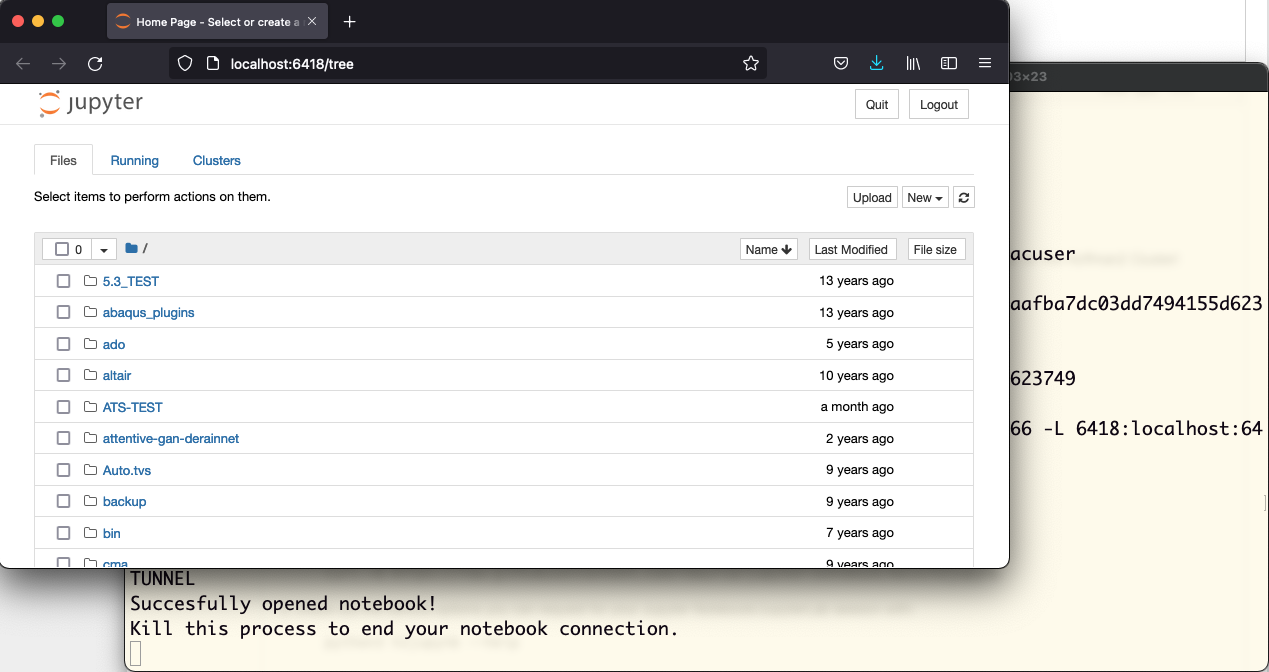

## Jupyter Notebook session via [h2jupynb](https://github.com/rdauria/jupyter-notebook) (Cont'd)

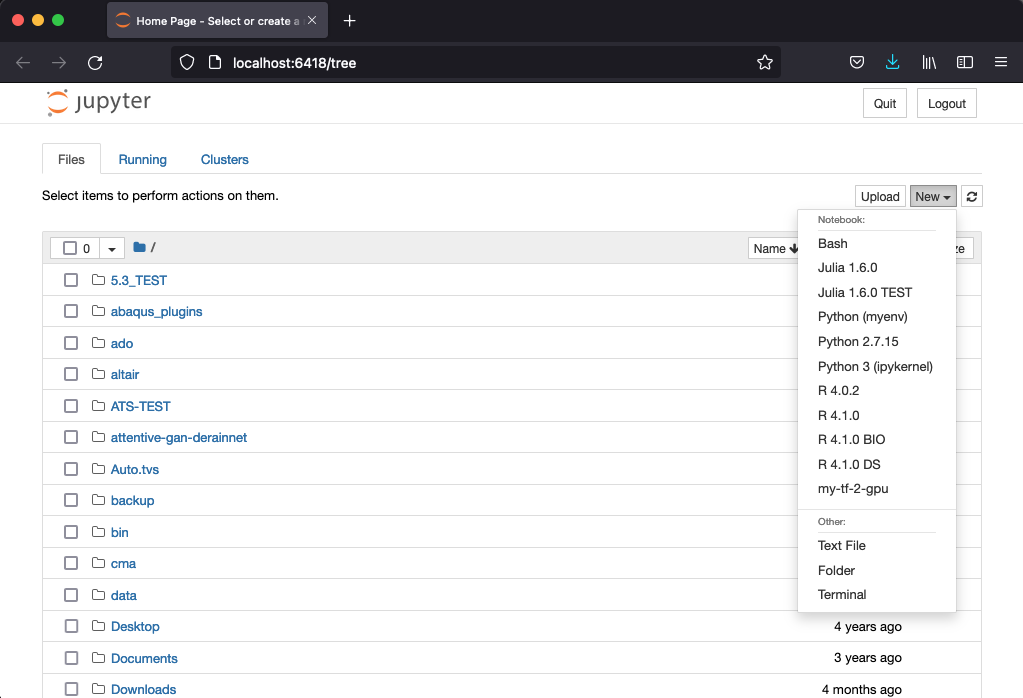

## Securing your Jupyter Notebook/Lab session

- from the `New` dropdown menu select `Terminal` 
   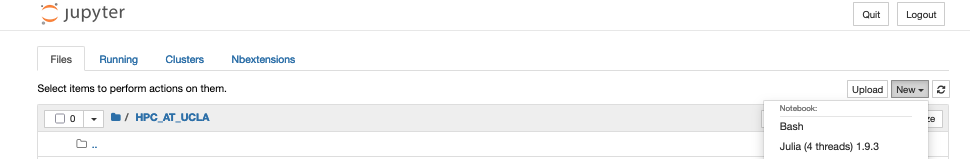
  


- at the terminal prompt issue:
  
  `jupyter notebook password`

- the hashed password is saved to your:
  
  `$HOME/.jupyter/jupyter_notebook_config.json`

- should you forget the password you can reseit it with:
  
  `rm $HOME/.jupyter/jupyter_notebook_config.json`
  

## Jupyter Notebook session via [h2jupynb](https://github.com/rdauria/jupyter-notebook) (Cont'd)

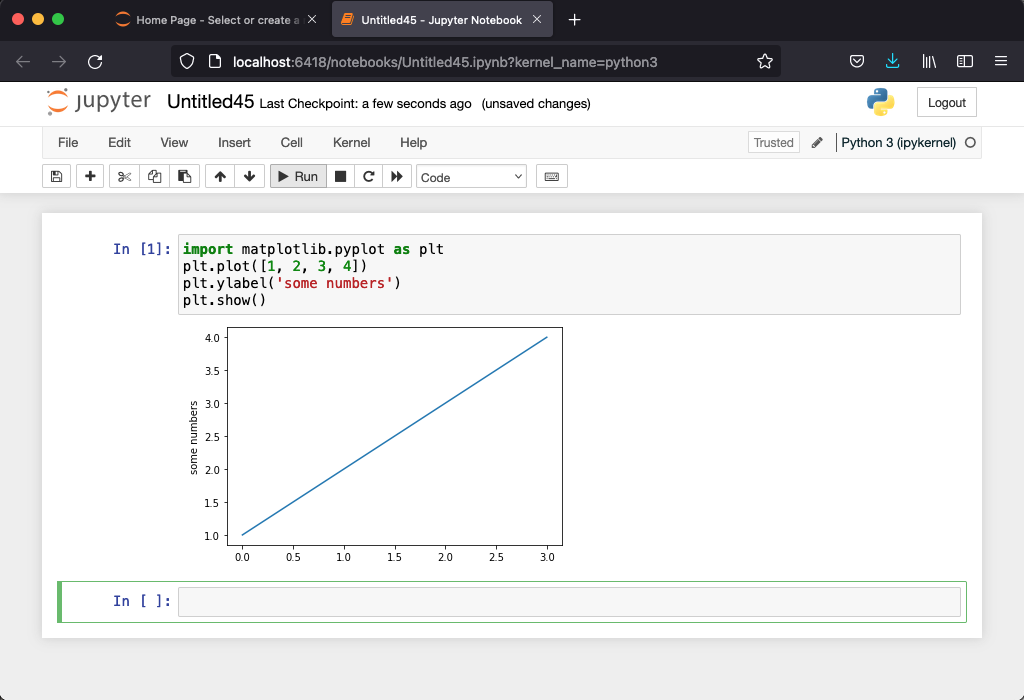

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

## Switching to JupyterLab

- edit the address and switch `tree` with `lab` and reload
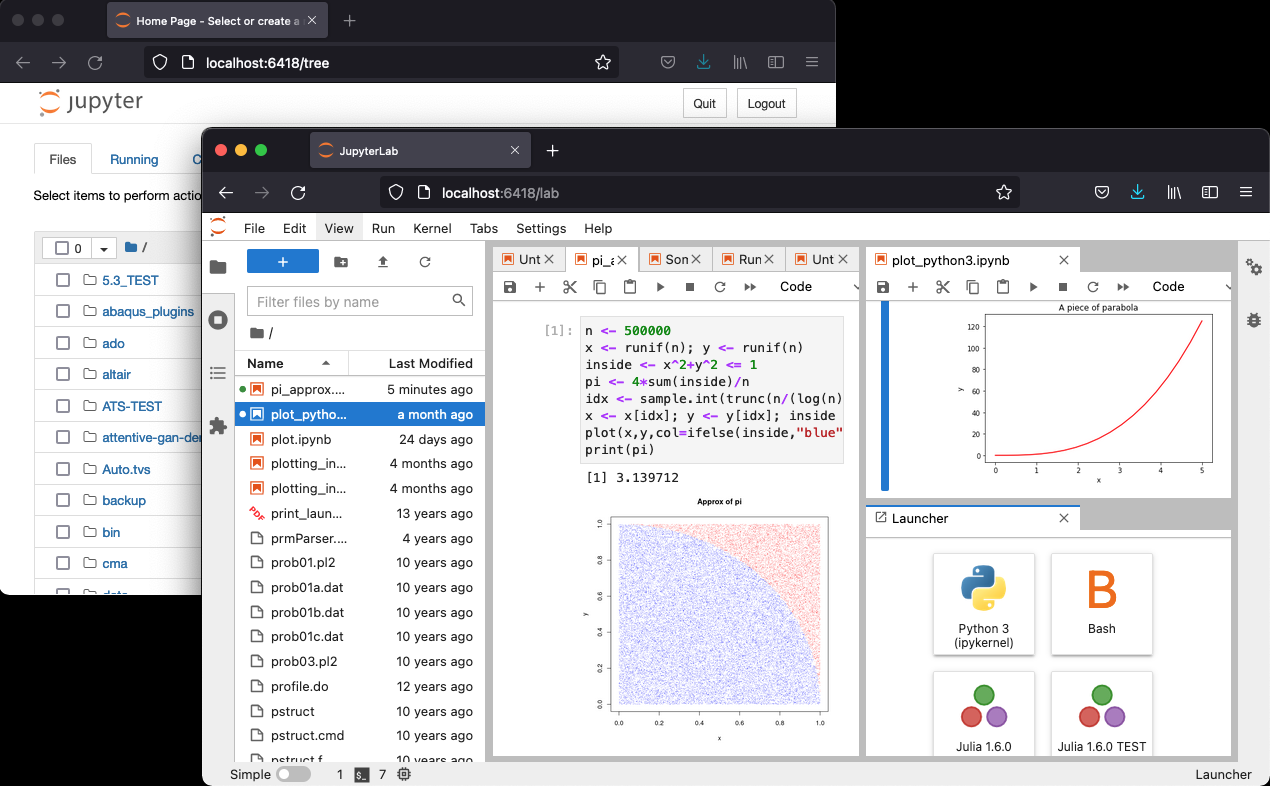

## Run this jupyter notebook as a slide deck

- Connect to the cluster via Jupyter using the h2jupynb
- open a terminal and issue:

```
  pip install rise --user 
  cp -p /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/Jupyter-on-H2C.ipynb ./
```


- reload the jupyter web interface and double click on the file:

  `Jupyter-on-H2C.ipynb`

- to play the presentation as a slide deck click on the RISE/Slideshow button 
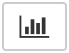

 
- to execute code in code cell use `Shift` + `Return`

## Run anaconda virtual environments in Jupyter

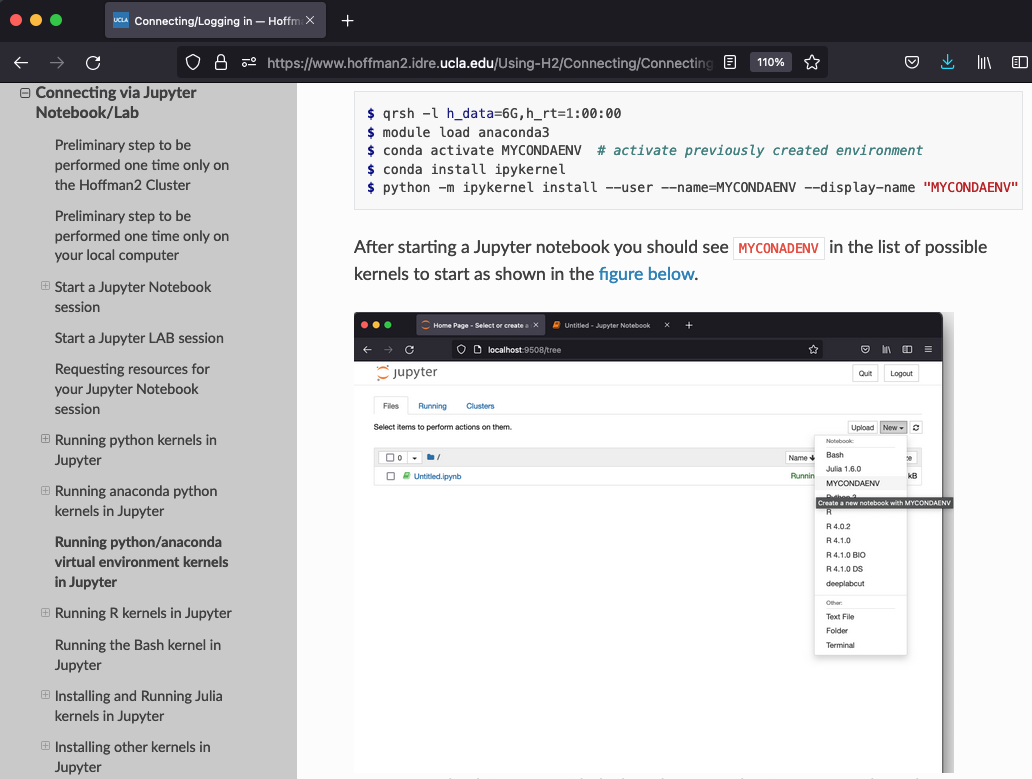

## Run anaconda virtual environments in Jupyter (Hands on)

- from the `New` dropdown menu select `Terminal` 
   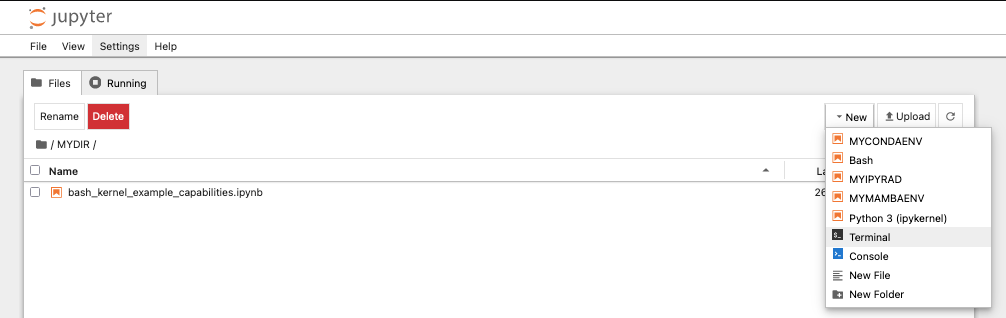

- in the terminal issue:
  
  ```
     module load mamba   # you could use anaconda3 instead
     echo y | conda create -n MYCONDAENV
     conda activate MYCONDAENV
     echo y | conda install ipykernel
     python -m ipykernel install --user --name "mycondaenv" --display-name "mycondaenv"
   ```
   
**NOTE**: This will create a `mycondaenv` kernel for the MYCONDAENV conda virtual environment so that we can run a jupyter notebook within it

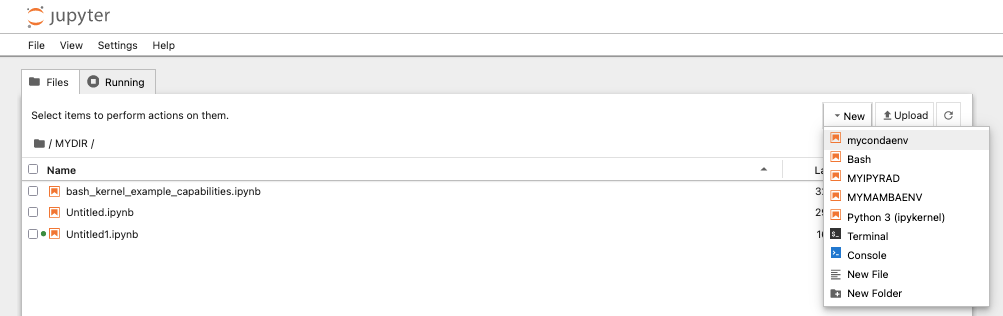

### check that you are running from the conda environemt by checking the version of python

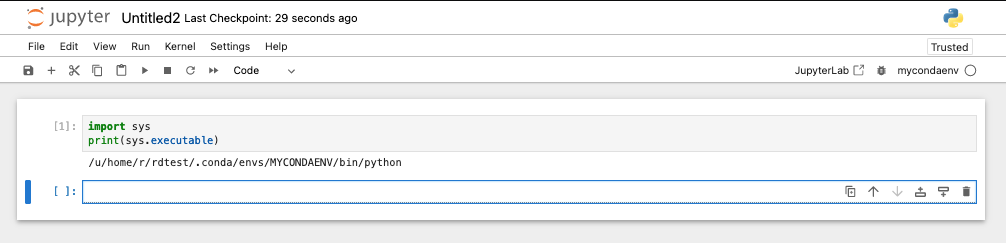

## Install packages in a conda environment

- in the jupyter notebook type:

```
  import sys
  import subprocess
  subprocess.run(["conda","install","--prefix",sys.prefix,"--yes","numpy"])
```

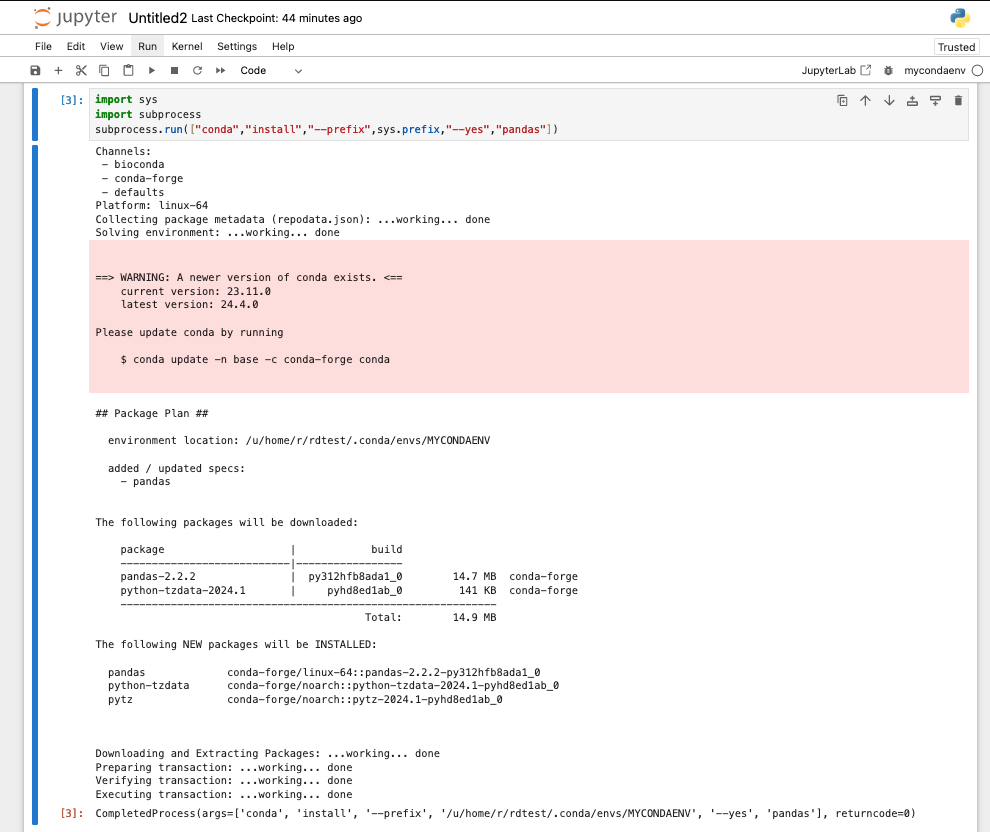

## Run regular python virtual environments in Jupyter (Hands-on)

You can create python environments with regular python (no anaconda this time)

- to do so open a terminal on the Hoffman2 Cluster (from a Jupyter session navigate to `New` and select `terminal`) and issue:

```
  module load python/3.9.6
  mkdir ~/.venv
  python -m venv ~/.venv/myvenv-3.9.6
  source ~/.venv/myvenv-3.9.6/bin/activate
  python -m pip install --upgrade pip
  # let's install some packages:
  pip install bokeh
  # now let's install ipykernl so that the virtual environmnt will be visible in jupyter
  pip install ipykernel
  python -m ipykernel install --user --name=myvenv-3.9.6 --display-name "myvenv-3.9.6"
```

- upon reloading the Jupyter interface you should see: `myvenv-3.9.6` in the list of accessible kernels

## ADVANCED: to make the kernel for this environment always loadable

Since the environment was created with python/3.9.6, should you select a different version of python to start your jupyter session you will need to tell the newly installed `myvenv-3.9.6` kernel how to load the python environment from which it depends.

- to do so, open a terminal on the Hoffman2 Cluster and issue:

  ```
  cd /u/home/systems/$USER/.local/share/jupyter/kernels/venv-3.9.6
  nano venv-3.9.6.sh
  ```

- add this content to your `/u/home/systems/$USER/.local/share/jupyter/kernels/venv-3.9.6/venv-3.9.6.sh`:

  ```
  #!/usr/bin/env bash
  . /u/local/Modules/default/init/modules.sh
  module load python/3.9.6 > /dev/null 2&>1
  source /u/home/systems/dauria/.venv/venv-3.9.6/bin/activate
  
  exec python -m ipykernel_launcher -f $@
  ```

- make the script executable:

  ```
  chmod u+x venv-3.9.6.sh
  ```



## ADVANCED: to make the kernel for this environment always loadable - cont'd

- now tell kernel.json what to do:

  ```
  mv kernel.json kernel.json_ORIG
  nano kernel.json
  ```
  
- add this content to your `/u/home/systems/$USER/.local/share/jupyter/kernels/venv-3.9.6/kernel.json`:

  ```
  {
    "argv": [
    "/u/home/systems/dauria/.local/share/jupyter/kernels/venv-3.9.6/venv-3.9.6.sh",
    "{connection_file}"
    ],
   "display_name": "venv-3.9.6",
   "language": "python",
   "metadata": {
     "debugger": true
   }
  }
  ```
  
- your new virtual environment will now be always accessible (no matter what version of python/anaconda you started the jupyter session with)

## Train one neuron 

Open a terminal from your Jupyter session and:

```
module load python/3.9.6
python -m venv ~/.venv/myTF_CPU
source ~/.venv/myTF_CPU/bin/activate
python3 -m pip install tensorflow
python3 -m pip install urllib3==1.26.18
python -m ipykernel install --user --name=myTF_CPU --display_name=myTF_CPU
pip install ipykernel
python -m ipykernel install --user --name myTF_CPU --display_name myTF_CPU
cp -p /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/train_one_neuron.ipynb ./
```

Open the `train_one_neuron.ipynb` jupyter notebook in the just created `myTF_CPU` kernel 

# Some kernels other than python are already centrally installed:

- R # several versions
- bash

### R notebook example

- Open a terminal from your jupyter session and type in it:

```
   cp -p /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/R-approx-of-pi.ipynb ./
```

- Reload the main Jupyter Notebook window and select `R-approx-of-pi.ipynb`

### Bash notebook example

- Open a terminal from your jupyter session and type in it:

```
   pip install bash_kernel
   python -m bash_kernel.install
   cp -p /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/bash-example.ipynb ./
```

- Reload the main Jupyter Notebook window and select `bash-example.ipynb`

## Installing your R kernels


- start your R renv and at the R prompt issue:


```
  install.packages('IRkernel')
  library(IRkernel)
  IRkernel::installspec(name = 'R-myrenv', displayname = 'R-myrenv')
```



## Example of IRkernel installation

In the example user `joebruin` installs R-reticulate within a conda environment (commands after the `$` shell prompt):

```bash
[joebruin@n6373 r-monocle3]$ module load anaconda3/2023.03
[joebruin@n6373 ~]$ conda create --name r-reticulate
Retrieving notices: ...working... done
Collecting package metadata (current_repodata.json): done
Solving environment: done
[...]
[joebruin@n6373 ~]$ conda activate r-reticulate
(r-reticulate) [joebruin@n6373 ~]$ conda install -c conda-forge r-reticulate
[...]
```

after installation the user starts R to install `IRkernel`:

```bash
(r-reticulate) [joebruin@n6373 ~]$ R
R version 4.3.2 (2023-10-31) -- "Eye Holes" 
[...]
```

at the R prompt issue (after the `>` R prompt):

```R
> install.packages('IRKernel')                                                                               
--- Please select a CRAN mirror for use in this session --- 
[...]
> library(IRkernel)
> IRkernel::installspec(name = 'R432-reticulate', displayname = 'R432-reticulate')
> q()
```

check that the kernel has been installed and available to future jupyter sessions:

```bash
(r-reticulate) [joebruin@n6373 ~]$ ls .local/share/jupyter/kernels/r432-reticulate
kernel.js  kernel.json  logo-64x64.png  logo-svg.svg
```

The kernel will be avaible as: R432-reticulate

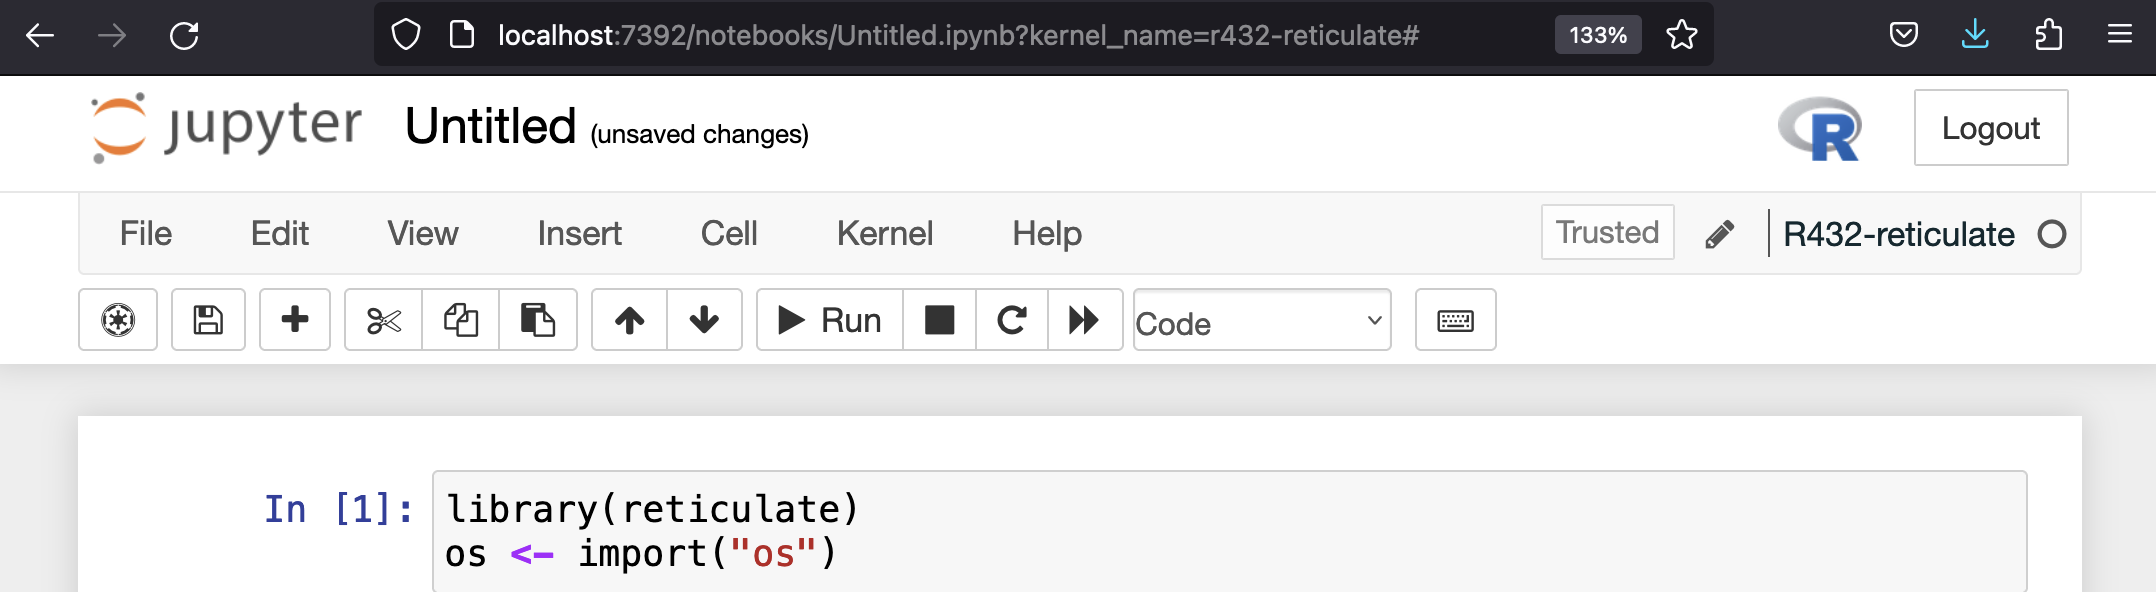

## Running julia kernels - you will need to insall the IJulia kernel:

- open a terminal on the Hoffman2 Cluster and issue:

  ```
  module load julia/1.9
  julia
  ```

- at the julia prompt issue:

  ```
  using Pkg
  Pkg.add("IJulia")
  Pkg.build("IJulia")
  using IJulia
  installkernel("Julia nodeps", "--depwarn=no")
  installkernel("Julia (4 threads)", env=Dict("JULIA_NUM_THREADS"=>"4"))
  ```

### Open a sample julia notebook

- Open a terminal from your jupyter session and type in it:

```
 cp -p /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/julia-1.9-sample-notebook.ipynb ./
```

- Reload the main Jupyter Notebook window and select `julia-1.9-sample-notebook.ipynb`